Data: Consumer complaints received about financial products and services
Data source: Public dataset downloaded from https://catalog.data.gov/dataset/consumer-complaint-database.

These are real world complaints received about financial products and services. Each complaint has been labeled with a specific product; therefore, this is a supervised text classification problem. With the aim to classify future complaints based on its content, we used different machine learning algorithms can make more accurate predictions (i.e., classify the complaint in one of the product categories).

In [194]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go

In [31]:
data = pd.read_csv("H:\\Industry Project\\Projects\\project files\\Finance\\complaints.csv")
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-05-15,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77498,NaN,NaN,Web,2023-05-15,In progress,Yes,NaN,6978115
1,2023-05-18,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"Credence Resource Management, LLC",CA,94558,NaN,NaN,Web,2023-05-18,In progress,Yes,NaN,6993157
2,2023-03-08,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,I believe Ascend Loans and XXXX are using misl...,Company has responded to the consumer and the ...,"Tribal Lending Enterprise, Inc.",CA,92683,NaN,Consent provided,Web,2023-03-08,Closed with explanation,Yes,NaN,6665035
3,2023-01-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33993,NaN,Consent not provided,Web,2023-02-13,Closed with non-monetary relief,Yes,NaN,6473143
4,2022-06-08,Debt collection,Mortgage debt,Attempts to collect debt not owed,Debt was paid,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",NV,89131,NaN,Consent not provided,Web,2022-06-08,Closed with explanation,Yes,NaN,5647636


In [32]:
data.describe(include="object").T

,count,unique,top,freq
Date received,3652800,4185,2023-03-14,4651
Product,3652800,18,"Credit reporting, credit repair services, or o...",1873202
Sub-product,3417509,76,Credit reporting,1853964
Issue,3652800,165,Incorrect information on your report,917506
Sub-issue,2945709,221,Information belongs to someone else,594239
Consumer complaint narrative,1320047,1137715,My credit reports are inaccurate. These inaccu...,1777
Company public response,1649999,11,Company has responded to the consumer and the ...,1429860
Company,3652800,6752,"EQUIFAX, INC.",667779
State,3611473,63,CA,433244
ZIP code,3622619,32853,XXXXX,91270


In [38]:
df=data.dropna(subset=["Consumer disputed?"]).reset_index().drop(columns='index')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-09-13,Credit card,NaN,Payoff process,NaN,"On XXXX XXXX, 2016, I instructed Citibank to c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60615,Older American,Consent provided,Web,2016-09-13,Closed with monetary relief,Yes,No,2108329
1,2016-11-26,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt was discharged in bankruptcy,I have been issued a writ of garnishment for a...,Company believes it acted appropriately as aut...,Allen & Withrow,AR,72756,NaN,Consent provided,Web,2016-11-26,Closed with explanation,Yes,Yes,2224168
2,2016-07-29,Debt collection,Credit card,Disclosure verification of debt,Not given enough info to verify debt,"See also Complaint XXXX, against XXXX XXXX XXX...",Company has responded to the consumer and the ...,Allen & Withrow,AR,728XX,NaN,Consent provided,Web,2016-08-31,Closed with explanation,Yes,No,2037039
3,2013-11-21,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Allen & Withrow,AR,72635,Older American,NaN,Postal mail,2013-11-21,Closed with explanation,Yes,No,607663
4,2014-10-15,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,Allen & Withrow,AR,71654,NaN,NaN,Referral,2014-10-21,Closed with explanation,Yes,No,1071507


In [51]:
df.shape

(768358, 18)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768358 entries, 0 to 768357
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 768358 non-null  object
 1   Product                       768358 non-null  object
 2   Sub-product                   533198 non-null  object
 3   Issue                         768358 non-null  object
 4   Sub-issue                     312988 non-null  object
 5   Consumer complaint narrative  164034 non-null  object
 6   Company public response       195709 non-null  object
 7   Company                       768358 non-null  object
 8   State                         762708 non-null  object
 9   ZIP code                      764501 non-null  object
 10  Tags                          108483 non-null  object
 11  Consumer consent provided?    297837 non-null  object
 12  Submitted via                 768358 non-null  object
 13 

In [52]:
drop_cols = ["Sub-product","Sub-issue", "Consumer complaint narrative","Company public response","ZIP code","Tags","Complaint ID"]

In [53]:
new_df = df.drop(columns=drop_cols)

In [92]:
new_df

,Date received,Product,Issue,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2016-09-13,Credit card,Payoff process,"CITIBANK, N.A.",IL,Consent provided,Web,2016-09-13,Closed with monetary relief,Yes,No
1,2016-11-26,Debt collection,Cont'd attempts collect debt not owed,Allen & Withrow,AR,Consent provided,Web,2016-11-26,Closed with explanation,Yes,Yes
2,2016-07-29,Debt collection,Disclosure verification of debt,Allen & Withrow,AR,Consent provided,Web,2016-08-31,Closed with explanation,Yes,No
3,2013-11-21,Debt collection,False statements or representation,Allen & Withrow,AR,NaN,Postal mail,2013-11-21,Closed with explanation,Yes,No
4,2014-10-15,Debt collection,Disclosure verification of debt,Allen & Withrow,AR,NaN,Referral,2014-10-21,Closed with explanation,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
768353,2017-03-24,Bank account or service,Using a debit or ATM card,JPMORGAN CHASE & CO.,FL,NaN,Referral,2017-03-24,Closed with explanation,Yes,No
768354,2013-02-13,Bank account or service,Deposits and withdrawals,TCF NATIONAL BANK,IL,NaN,Web,2013-02-15,Closed with explanation,Yes,Yes
768355,2015-12-19,Credit reporting,Credit reporting company's investigation,"EQUIFAX, INC.",IL,Consent not provided,Web,2015-12-19,Closed with explanation,Yes,Yes
768356,2014-06-04,Credit reporting,Incorrect information on credit report,"EQUIFAX, INC.",FL,NaN,Web,2014-06-04,Closed with non-monetary relief,Yes,Yes


In [54]:
for col in new_df.columns:
    print(col, new_df[col].nunique())

Date received 1970
Product 13
Issue 99
Company 4281
State 62
Consumer consent provided? 4
Submitted via 6
Date sent to company 2049
Company response to consumer 7
Timely response? 2
Consumer disputed? 2


In [55]:
new_df.isna().sum()

Date received                        0
Product                              0
Issue                                0
Company                              0
State                             5650
Consumer consent provided?      470521
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
dtype: int64

### Consumer disputed?

In [97]:
df["Consumer disputed?"].value_counts(normalize=True)

No     0.806889
Yes    0.193111
Name: Consumer disputed?, dtype: float64

Clearly it is a imbalnce issue, we need to balance it before applying any model on top of it.

In [101]:
# Calculate the value counts
disp_value_counts = new_df['Consumer disputed?'].value_counts()

# Create a list of colors for the pie chart slices
colors = ['blue', 'green'] 

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=disp_value_counts.index,
    values=disp_value_counts.values,
    pull=[0.1 if label == 'Yes' else 0 for label in disp_value_counts.index],  # Pull the 'Yes' section outside
    marker=dict(colors=colors)
)])

# Update hover and text information
fig.update_traces(hoverinfo='label+percent', textinfo='value')



### Which product has more complaints?

In [98]:
product_percentage = new_df["Product"].value_counts(normalize=True)*100
product_percentage[:10]

Mortgage                   29.528944
Debt collection            18.969022
Credit reporting           18.276507
Credit card                11.607870
Bank account or service    11.219380
Student loan                4.233443
Consumer Loan               4.109413
Payday loan                 0.721148
Money transfers             0.696811
Prepaid card                0.497034
Name: Product, dtype: float64

Mortgage has more complaints with complaint percentage of 30% followed by debt collection 

In [105]:
# Calculate the value counts
prod_value_counts = new_df['Product'].value_counts()[:10]

# Create a list of colors for the pie chart slices
colors = ['blue', 'green',"orange", "red", "yellow", "pink"] 

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=prod_value_counts.index,
    values=prod_value_counts.values,
    marker=dict(colors=colors)
)])

# Update hover and text information
fig.update_traces(hoverinfo='label+percent', textinfo='value')

### Top 10 issues in the complaint

In [107]:
new_df["Issue"].value_counts(normalize=True)[:10]

Loan modification,collection,foreclosure    0.146164
Incorrect information on credit report      0.133641
Loan servicing, payments, escrow account    0.100642
Cont'd attempts collect debt not owed       0.078940
Account opening, closing, or management     0.049405
Disclosure verification of debt             0.040066
Communication tactics                       0.031012
Deposits and withdrawals                    0.029740
Dealing with my lender or servicer          0.022935
Application, originator, mortgage broker    0.022423
Name: Issue, dtype: float64

In [162]:

# Calculate the value counts
issue_value_counts = new_df["Issue"].value_counts()[:10]

# Create a bar graph
fig = go.Figure(data=go.Bar(
    x=issue_value_counts.index,
    y=issue_value_counts.values,
    marker_color='blue'  # Customize the color as desired
))

# Add axis labels and title
fig.update_layout(
    xaxis_title='Values',
    yaxis_title='Count',
    title="Most issues in the complaint raised by customer"
)

# Show the plot
fig.show()


### Top 10 company having most of the complaints

In [114]:
new_df["Company"].value_counts(normalize=True)[:10]*100

BANK OF AMERICA, NATIONAL ASSOCIATION     8.588705
WELLS FARGO & COMPANY                     6.988019
EQUIFAX, INC.                             6.297846
Experian Information Solutions Inc.       5.937597
JPMORGAN CHASE & CO.                      5.548195
TRANSUNION INTERMEDIATE HOLDINGS, INC.    5.206688
CITIBANK, N.A.                            4.524974
Ocwen Financial Corporation               3.135648
CAPITAL ONE FINANCIAL CORPORATION         2.643820
Navient Solutions, LLC.                   2.342918
Name: Company, dtype: float64

In [164]:
# Calculate the value counts
comp_value_counts = new_df["Company"].value_counts()[:10]

# Create a bar graph
fig = go.Figure(data=go.Bar(
    x=comp_value_counts.index,
    y=comp_value_counts.values,
    marker_color='green'  # Customize the color as desired
))

# Add axis labels and title
fig.update_layout(
    xaxis_title='Values',
    yaxis_title='Count',
    title='Top 10 Company with most number of complaints'
)

# Show the plot
fig.show()

In [139]:
state_df = new_df.groupby("State")["Company"].value_counts().to_frame()
state_df = state_df.rename(columns={"Company": "Count"})
state_df.sort_values(by="Count", ascending=False)

Count
State Company                                     
CA    BANK OF AMERICA, NATIONAL ASSOCIATION  12770
      WELLS FARGO & COMPANY                  10133
      JPMORGAN CHASE & CO.                    7546
FL    BANK OF AMERICA, NATIONAL ASSOCIATION   7472
CA    Experian Information Solutions Inc.     6622
...                                            ...
NM    Brinkman Alliance Group                    1
      Brookshaw Management, LLC                  1
      CCB Credit Serivces, Inc                   1
      CHARLES SCHWAB CORPORATION, THE            1
WY    ZARVAD III S.A.                            1

[34574 rows x 1 columns]

California state has most complaints with companies like BOA and NA

### Top 10 States with customers raised dispute

In [159]:
filtered_df=new_df[new_df["Consumer disputed?"] == 'Yes']
filtered_df["State"].value_counts().to_frame()[:10]

,State
CA,22587
FL,13904
TX,10681
NY,9841
GA,6739
NJ,5831
IL,5558
VA,5100
PA,5091
MD,4982


In [160]:
new_df["Submitted via"].value_counts()

Web            522985
Referral       133241
Phone           52189
Postal mail     48672
Fax             10923
Email             348
Name: Submitted via, dtype: int64

In [161]:
# Calculate the value counts
sub_value_counts = new_df["Submitted via"].value_counts()

# Create a list of colors for the pie chart slices
colors = ['blue', 'green',"orange", "red", "yellow", "pink"] 

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=sub_value_counts.index,
    values=sub_value_counts.values,
    marker=dict(colors=colors)
)])

# Update hover and text information
fig.update_traces(hoverinfo='label+percent', textinfo='value')

In [179]:
comp_respose_disp=new_df.groupby("Company response to consumer")['Consumer disputed?'].value_counts(normalize=True).to_frame()*100
comp_respose_disp.rename(columns={"Consumer disputed?":"diputed_percentage"})

diputed_percentage
Company response to consumer    Consumer disputed?                    
Closed                          No                           79.416274
                                Yes                          20.583726
Closed with explanation         No                           78.771243
                                Yes                          21.228757
Closed with monetary relief     No                           89.415405
                                Yes                          10.584595
Closed with non-monetary relief No                           88.370777
                                Yes                          11.629223
Closed with relief              No                           86.651584
                                Yes                          13.348416
Closed without relief           No                           73.074771
                                Yes                          26.925229
Untimely response               No                           99.928341
                                Yes                           0.071659

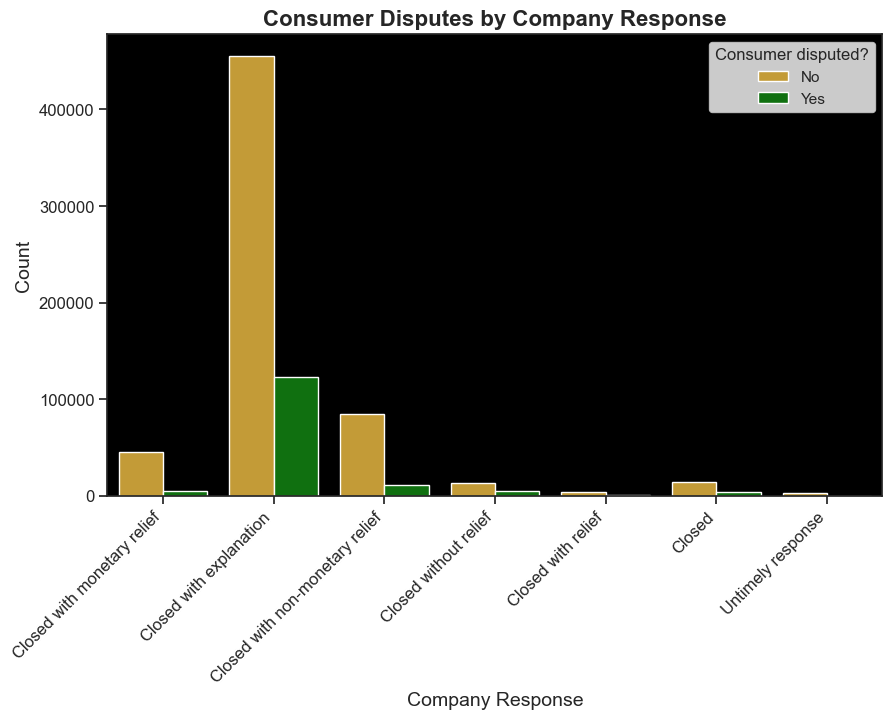

In [191]:
sns.set(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired

# Set the color palette
custom_palette = ["goldenrod", "green"]
sns.set_palette(custom_palette)

ax = sns.countplot(x="Company response to consumer", hue="Consumer disputed?", data=new_df)

# Customize the plot
ax.set_title("Consumer Disputes by Company Response", fontsize=16, fontweight='bold')

ax.tick_params(labelsize=12)
ax.set_xlabel("Company Response", fontsize=14) 
ax.set_ylabel("Count", fontsize=14) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the background color to black
ax.set_facecolor('black')

### Dispute raised after Company raised to consumer

In [192]:
filtered_df["Company response to consumer"].value_counts()

Closed with explanation            122695
Closed with non-monetary relief     11098
Closed with monetary relief          5439
Closed without relief                4811
Closed                               3625
Closed with relief                    708
Untimely response                       2
Name: Company response to consumer, dtype: int64

### Any impact on dispute based on difference of complaint date received and sent to company 

In [196]:
def convertDate(date):
    return datetime.strptime(date, "%Y-%m-%d")

In [221]:
try:
    new_df["Date sent to company"] = new_df["Date sent to company"].apply(convertDate)
    new_df["Date received"] = new_df["Date received"].apply(convertDate)
except TypeError as e:
    print(e)
    


strptime() argument 1 must be str, not Timestamp


In [216]:
new_df["Date Difference"] = (new_df["Date sent to company"] - new_df["Date received"])
new_df["Date Difference"] = new_df["Date Difference"].apply(lambda x: int(str(x).split()[0]))

In [224]:
new_df.groupby(["Consumer disputed?"])["Date Difference"].sum()

Consumer disputed?
No     2843776
Yes     511763
Name: Date Difference, dtype: int64

It clearly shows that disputes do not depend on the delay parameter

### In which year we received the highest complaint?

In [253]:
viz_date = new_df.copy()
viz_date["year received"] = pd.to_datetime(viz_date["Date received"]).dt.year

[Text(0, 0, '2011'),
 Text(1, 0, '2012'),
 Text(2, 0, '2013'),
 Text(3, 0, '2014'),
 Text(4, 0, '2015'),
 Text(5, 0, '2016'),
 Text(6, 0, '2017')]

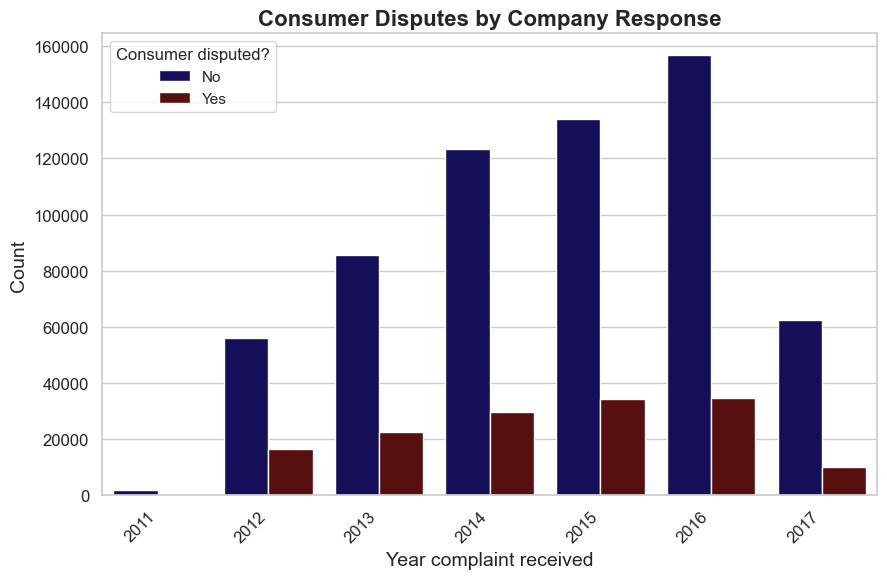

In [264]:
sns.set(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired

palette = ["#090364", "#640303"]

sns.set_style("whitegrid")
sns.set_palette(palette)

ax = sns.countplot(x="year received", hue="Consumer disputed?", data=viz_date)

# Customize the plot
ax.set_title("Consumer Disputes by Company Response", fontsize=16, fontweight='bold')

ax.tick_params(labelsize=12)
ax.set_xlabel("Year complaint received", fontsize=14) 
ax.set_ylabel("Count", fontsize=14) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


In 2016 and 2015 we got most of the complaints and in 2017 it was reduced.

### Whether timely response has any impact in raising the dispute?

In [263]:
new_df.groupby(["Timely response?"],as_index=False)["Consumer disputed?"].count()

,Timely response?,Consumer disputed?
0,No,21396
1,Yes,746962


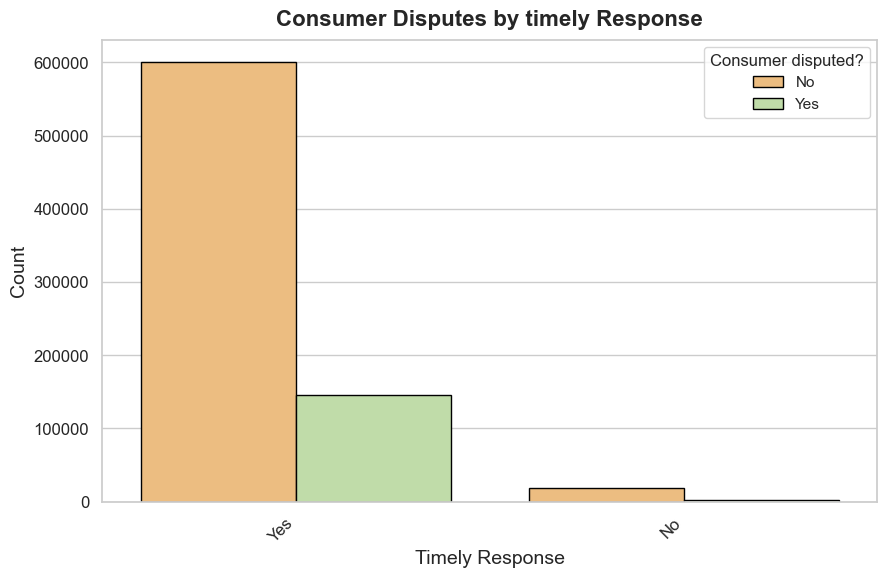

In [270]:
sns.set(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired

sns.set_style("whitegrid")
sns.set_palette(palette)

ax = sns.countplot(x="Timely response?", hue="Consumer disputed?", data=viz_date, ec = "black", palette="Spectral")

# Customize the plot
ax.set_title("Consumer Disputes by timely Response", fontsize=16, fontweight='bold', pad=10)

ax.tick_params(labelsize=12)
ax.set_xlabel("Timely Response", fontsize=14) 
ax.set_ylabel("Count", fontsize=14) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Timely response has no impact as the statement i ncontrad